## Practical Work 1

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

## Multivariate LR

#### Read MultipleLR csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [42]:
df = pd.read_csv('MultipleLR.csv',header=None)
print(df)

     0   1    2    3
0   73  80   75  152
1   93  88   93  185
2   89  91   90  180
3   96  98  100  196
4   73  66   70  142
5   53  46   55  101
6   69  74   77  149
7   47  56   60  115
8   87  79   90  175
9   79  70   88  164
10  69  70   73  141
11  70  65   74  141
12  93  95   91  184
13  79  80   73  152
14  70  73   78  148
15  93  89   96  192
16  78  75   68  147
17  81  90   93  183
18  88  92   86  177
19  78  83   77  159
20  82  86   90  177
21  86  82   89  175
22  78  83   85  175
23  76  83   71  149
24  96  93   95  192


In [43]:
y=df.iloc[:,3].values
df.drop(df.columns[3], axis=1, inplace=True)
X=df.values




In [44]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
ones=np.ones((X.shape[0], 1))
X=np.hstack((ones, X))
X_scaled=np.hstack((ones, X_scaled))

In [25]:
print(X)

[[  1.  73.  80.  75.]
 [  1.  93.  88.  93.]
 [  1.  89.  91.  90.]
 [  1.  96.  98. 100.]
 [  1.  73.  66.  70.]
 [  1.  53.  46.  55.]
 [  1.  69.  74.  77.]
 [  1.  47.  56.  60.]
 [  1.  87.  79.  90.]
 [  1.  79.  70.  88.]
 [  1.  69.  70.  73.]
 [  1.  70.  65.  74.]
 [  1.  93.  95.  91.]
 [  1.  79.  80.  73.]
 [  1.  70.  73.  78.]
 [  1.  93.  89.  96.]
 [  1.  78.  75.  68.]
 [  1.  81.  90.  93.]
 [  1.  88.  92.  86.]
 [  1.  78.  83.  77.]
 [  1.  82.  86.  90.]
 [  1.  86.  82.  89.]
 [  1.  78.  83.  85.]
 [  1.  76.  83.  71.]
 [  1.  96.  93.  95.]]


In [46]:
print(X_scaled)

[[ 1.         -0.5020131   0.04244515 -0.56212061]
 [ 1.          1.16028194  0.69544741  0.99932553]
 [ 1.          0.82782293  0.94032326  0.73908451]
 [ 1.          1.40962619  1.51170024  1.60655458]
 [ 1.         -0.5020131  -1.10030881 -0.99585565]
 [ 1.         -2.16430814 -2.73281447 -2.29706076]
 [ 1.         -0.83447211 -0.44730655 -0.38862659]
 [ 1.         -2.66299665 -1.91656164 -1.86332573]
 [ 1.          0.66159343 -0.03918014  0.73908451]
 [ 1.         -0.00332459 -0.77380768  0.56559049]
 [ 1.         -0.83447211 -0.77380768 -0.73561463]
 [ 1.         -0.75135736 -1.1819341  -0.64886762]
 [ 1.          1.16028194  1.26682439  0.82583151]
 [ 1.         -0.00332459  0.04244515 -0.73561463]
 [ 1.         -0.75135736 -0.52893183 -0.30187959]
 [ 1.          1.16028194  0.77707269  1.25956655]
 [ 1.         -0.08643934 -0.36568127 -1.16934966]
 [ 1.          0.16290491  0.85869798  0.99932553]
 [ 1.          0.74470818  1.02194854  0.39209647]
 [ 1.         -0.08643934  0.28

In [48]:
alpha = [1,0.1,0.01,0.001,0.0001]

### Repeat your implementation but for more than one variable

In [49]:
def run(x,y,alpha,num_iters):
    theta=np.zeros(x.shape[1])
    m = len(y)
    J_history = []
    norm_history = []
    for i in range(num_iters):
        h = x.dot(theta)
        error = h - y
        gradient = (1/m) * x.T.dot(error)
        theta = theta - alpha * gradient
        J = (1/(2*m)) * np.sum(error**2)
        if np.isnan(J) or np.isinf(J):
            print("Divergence detected at iteration", i)
            break
        J_history.append(J)
        norm_history.append(np.linalg.norm(gradient))
    return J_history, norm_history

C:\Users\Admin\AppData\Local\Temp\ipykernel_14020\3089587421.py:11: RuntimeWarning: overflow encountered in square
  J = (1/(2*m)) * np.sum(error**2)


Divergence detected at iteration 36
Divergence detected at iteration 620
Divergence detected at iteration 46
Divergence detected at iteration 67
Divergence detected at iteration 120


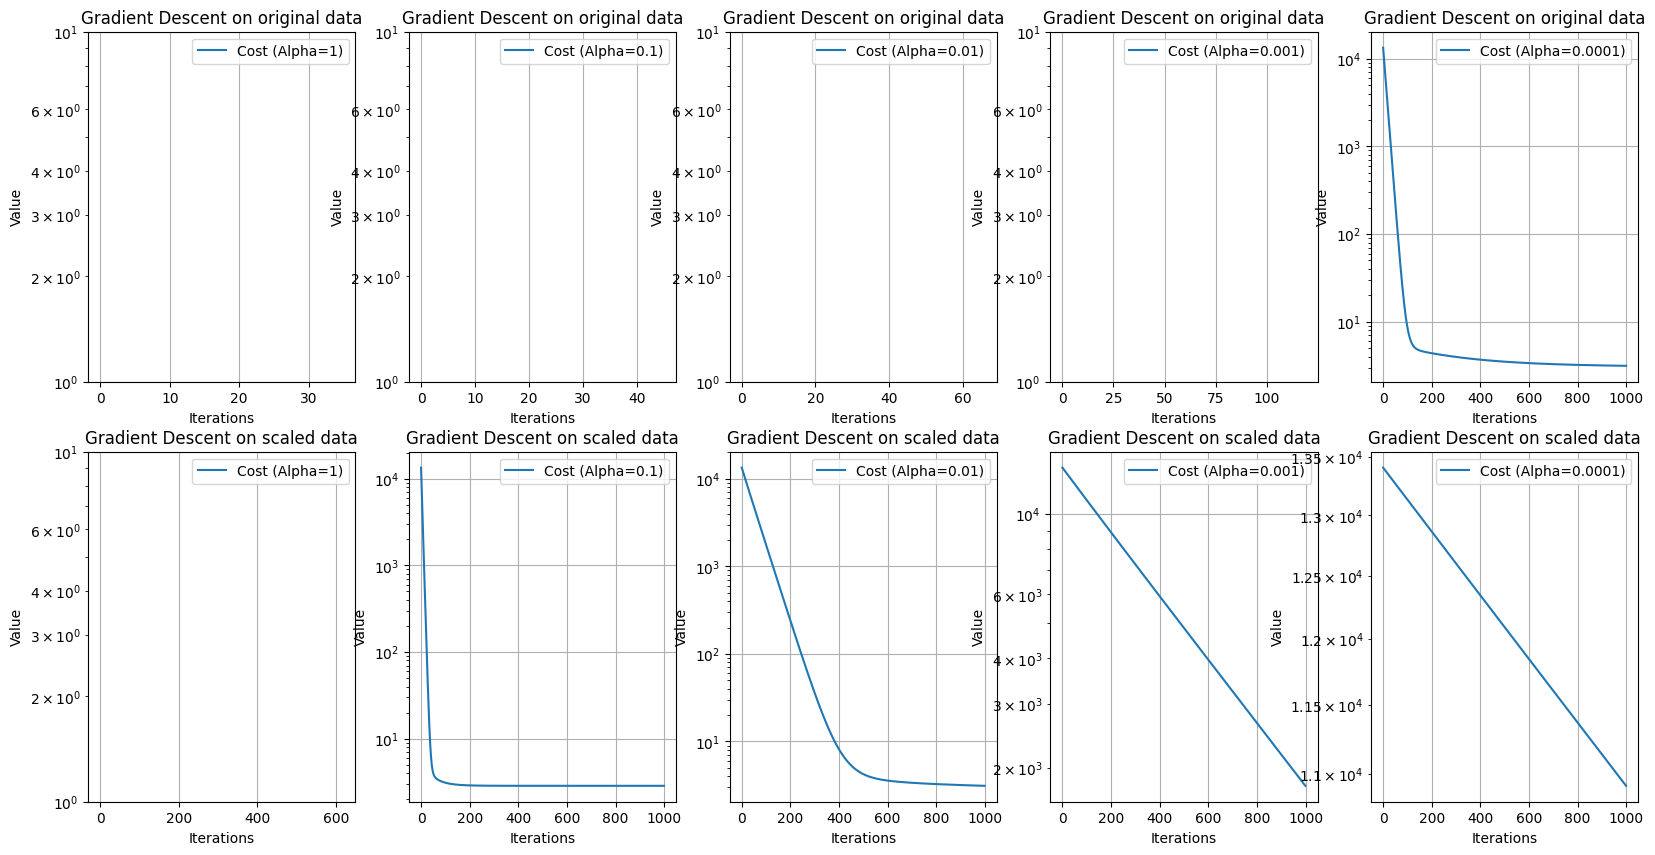

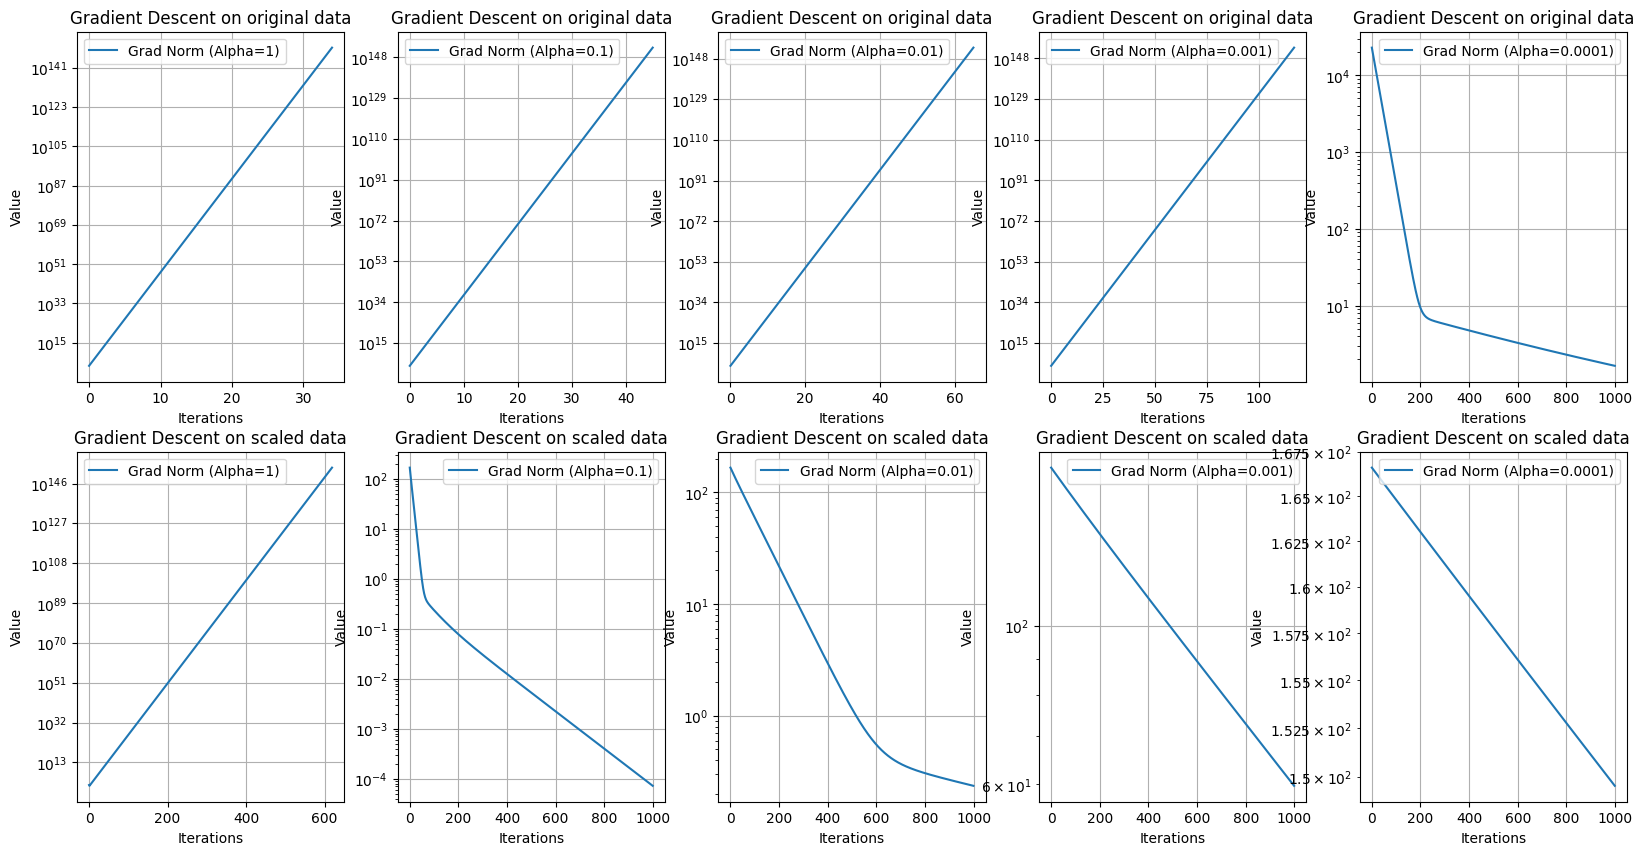

In [78]:
data=[X,X_scaled]
fig1, axs1 = plt.subplots(2,5, figsize=(20,10))
fig2, axs2 = plt.subplots(2,5, figsize=(20,10))

for i, a in enumerate(alpha):
    for j, x in enumerate(data):
        J_history, norm_history = run(x, y, a, 1000)
        ax1 = axs1[j, i]
        ax1.set_yscale('log')
        ax1.plot(J_history, label=f'Cost (Alpha={a})')
        s='scaled data' if (x==X_scaled).all() else 'original data'
        ax1.set_title(f'Gradient Descent on {s}')
        
        ax1.set_xlabel("Iterations")
        ax1.set_ylabel("Value")
        ax1.legend()
        ax1.grid()
        
        
        ax2 = axs2[j, i]
        ax2.set_yscale('log')
        s='scaled data' if (x==X_scaled).all() else 'original data'
        ax2.set_title(f'Gradient Descent on {s}')
        ax2.plot(norm_history, label=f'Grad Norm (Alpha={a})')
        
        ax2.set_xlabel("Iterations")
        ax2.set_ylabel("Value")
        ax2.legend()
        ax2.grid()
plt.show()